<h1 align='center'> Galaxy Distance Using Spectra </h1>
<h4 align='center'> Author: Md. Iftakhar Hossain Simanto, K M Shariat Ullah</h4>

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy as np
from scipy.integrate import quad

In [21]:
data = pd.read_csv('data.csv')

wave = data.Wavelength[1000:1100]
intensity= data.Intensity[1000:1100]

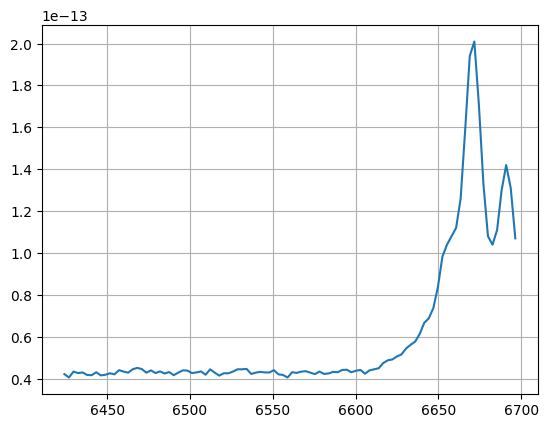

100

In [25]:
plt.plot(wave, intensity)
plt.grid()
plt.show()

len(wave)


In [64]:
x = find_peaks(intensity, height= 1.95e-13)
wave[1000+90]


np.float64(6671.65)

In [71]:
wave_obs= 6671.65   #angstrom
wave_src=6562.8     #angstrom

z = (wave_obs-wave_src)/wave_src
print(f"Redshift value of z: {z}")

#constant 

c = 299792458
H_0 = 72 # Km/s/Mpc
d_actual = 66.47 #Mpc

#converting redshift z to velocity v

v = c*z   # m/s
v= v/1000 # km/s
print(f"Velocity of NGC 7469: {v}")

d_cal= v/H_0

print(f"Distance of NGC 7469: {d_cal}")

error = abs((d_actual-d_cal)/d_actual*100)

print(f"error: {error}")




Redshift value of z: 0.0165859084537087
Velocity of NGC 7469: 4972.33026350031
Distance of NGC 7469: 69.06014254861542
error: 3.8967091148118222


In [101]:
# modified calculations 

z1 = 0.001 #arbritary but z2>z1
z2 = 0.0165859084537087 #observed value

# Calculate relative redshifts:
relative_redshift = (1 + z2) / (1 + z1) - 1  #1+ Z12= (1 + z2) / (1 + z1) 
print(f"Relative redshift between objects at z1={z1} and z2={z2}: {relative_redshift}")

#Pecuilar Velocity: 
Vpec = c* (z2-z1)/1+z2

print(f"pecuilar velocity= {Vpec}")


Omega_M = 0.315        
Omega_k = 0.001      
Omega_Lambda = 0.685 

integral,error= quad(lambda z: 1 / np.sqrt(Omega_M * (1 + z)**3 + Omega_k * (1 + z)**2 + Omega_Lambda), 0, z)

hubble_distance = c/H_0

distance = hubble_distance* integral 

print(f"distance is= {distance}")

error_distance01= abs((d_actual-distance)/d_actual*100)

print(f"error distance= {error_distance01}")


Relative redshift between objects at z1=0.001 and z2=0.0165859084537087: 0.015570338115593385
pecuilar velocity= 4672537.822086219
distance is= 69.02536757931033
error distance= 3.84439232632816
